In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import *
from tailor.visualization import *

In [3]:
df = tailor.load_data()

In [4]:
df = cluster(df, distance_measure=distance.euclidean, distance_target='article_count')

In [5]:
b = df.cluster.unique()
print(sorted(b, reverse=True))

[5, 4, 2, 1, 0]


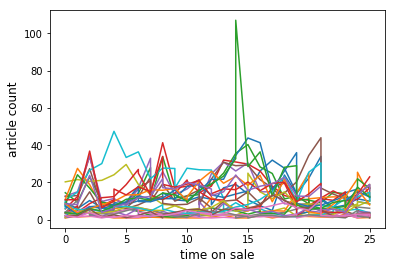

In [6]:
cluster_scatter(df, 4, distance.euclidean, 'article_count')
plot_cluster_articles(df, 4, 'article_count', legend=False);

9.500589363661057


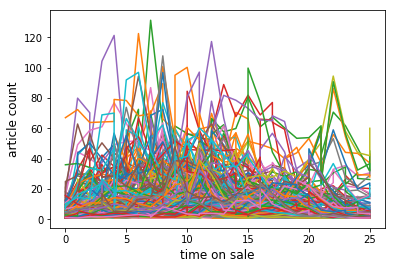

In [7]:
print(cluster_scatter(df, 2, distance.euclidean, 'article_count'))
plot_cluster_articles(df, 2, 'article_count', legend=False);

3.7454838435161646


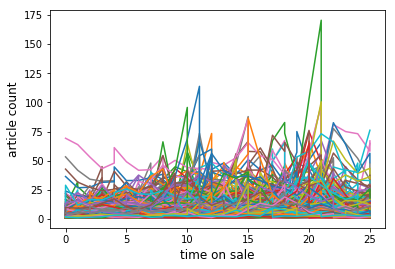

In [8]:
print(cluster_scatter(df, 0, distance.euclidean, 'article_count'))
plot_cluster_articles(df, 0, 'article_count', legend=False);

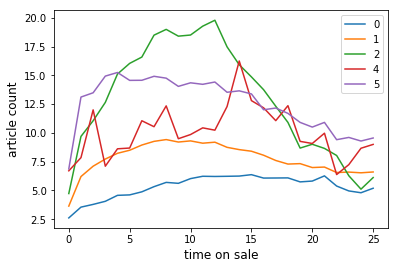

In [9]:
plot_feature_characteristics(df, 'cluster', 'article_count');

In [10]:
cluster_separation(df, 2, 5, distance.euclidean, 'article_count')

2.6679035578327577

In [11]:
cluster_separation(df, 2, 5, distance.euclidean, 'article_count')

2.6679035578327577

In [12]:
# davis_bouldin(df, distance.euclidean, 'article_count')

### Why choosing a different evaluation metric than the 'rank_features'?

In [17]:
df = tailor.load_data()
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season', 'month']
ranked_features = ranking.rank_features(df, distance.euclidean, feats, 'article_count')
print(ranked_features)
for feat in ranked_features.index:
    df_cluster = build_clusters(df, feat, distance.euclidean, 'article_count')
    char_to_clusters = df_cluster.loc[:, [feat, 'cluster']].groupby(feat).mean()
    result = df.merge(char_to_clusters, left_on=feat, right_on=feat)
    print(output_clusters(result, feat))
    print("DB-",feat, ":", davis_bouldin(result, distance.euclidean, 'article_count'))

Abteilung    1.098196
brand        0.256130
WHG          0.250199
month        0.248026
season       0.199529
WUG          0.132761
color        0.059410
dtype: float64
cluster
0                                Abteilung005
1    Abteilung007, Abteilung002, Abteilung006
2                                Abteilung001
4                                Abteilung003
5                                Abteilung004
Name: Abteilung, dtype: object
DB- Abteilung : 7.187136707638688
cluster
0     Fimmilena, Gersimi, Loki, Turstuahenae, Traval...
4     Börr, Mannus, Verdandi, Fulla, Yngvi, Hercules...
9     Alaferhviae, Heimdall, Snotra, Wanen, Siofna, ...
39                                              Forseti
43                                                Sigyn
59                                                  Dag
60                                             Hurstrga
68                                      Mars Halamardus
Name: brand, dtype: object
DB- brand : 7.554032922775935
cluster
0     W

In [15]:
print(df_cluster)

        Abteilung  time_on_sale  original_price  sells_price  discount  \
0    Abteilung005             0       64.266279    62.632858  1.628886   
1    Abteilung005             1       64.686777    63.280696  1.346549   
2    Abteilung005             2       64.405046    62.937726  1.373538   
3    Abteilung005             3       64.569464    62.616309  1.707365   
4    Abteilung005             4       63.469816    60.524982  2.490292   
5    Abteilung005             5       64.417069    61.677170  1.931339   
6    Abteilung005             6       64.799125    61.077134  2.398673   
7    Abteilung005             7       64.262576    60.179475  2.101983   
8    Abteilung005             8       64.028736    58.997108  2.521803   
9    Abteilung005             9       64.220286    58.197666  2.496293   
10   Abteilung005            10       64.929394    58.022097  2.416748   
11   Abteilung005            11       64.340084    56.359201  2.234395   
12   Abteilung005            12       